<a href="https://colab.research.google.com/github/jinwu-5/UnderstandingDeepLearning/blob/main/Notebooks/Chap10/10_4_Downsampling_and_Upsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 10.4: Downsampling and Upsampling**

This notebook investigates the upsampling and downsampling methods discussed in section 10.4 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

In [26]:
# Define 4 by 4 original patch
orig_4_4 = np.array([[1, 3, 5,3 ], [6,2,0,8], [4,6,1,4], [2,8,0,3]])
print(orig_4_4)

[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]


In [27]:
def subsample(x_in):
    x_out = np.zeros((int(np.ceil(x_in.shape[0]/2)),
                      int(np.ceil(x_in.shape[1]/2))))

    # take every 2nd element starting at index 0
    for i in range(0, x_in.shape[0], 2):
        for j in range(0, x_in.shape[1], 2):
            x_out[i//2, j//2] = x_in[i, j]

    return x_out


In [28]:
print("Original:")
print(orig_4_4)
print("Subsampled:")
print(subsample(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Subsampled:
[[1. 5.]
 [4. 1.]]


Let's try that on an image to get a feel for how it works:

In [5]:
!wget https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap10/test_image.png

--2025-08-17 01:27:45--  https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap10/test_image.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60792 (59K) [image/png]
Saving to: ‘test_image.png’

test_image.png      100%[===================>]  59.37K  --.-KB/s    in 0.02s   

2025-08-17 01:27:45 (3.77 MB/s) - ‘test_image.png’ saved [60792/60792]



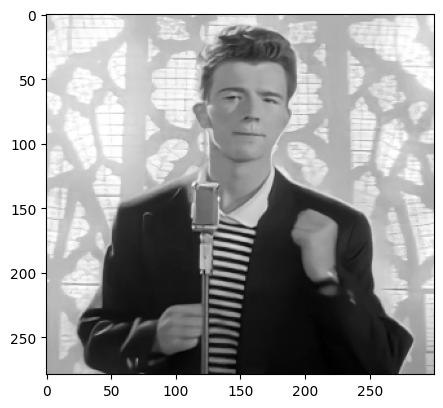

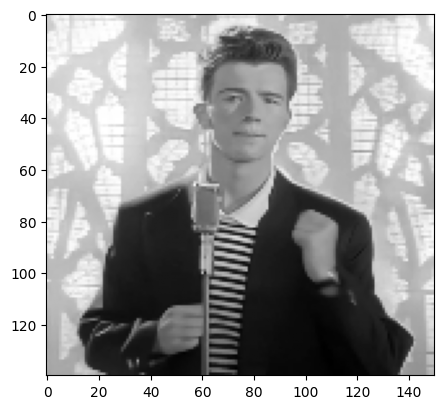

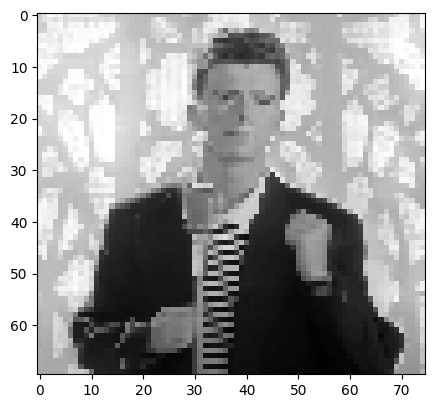

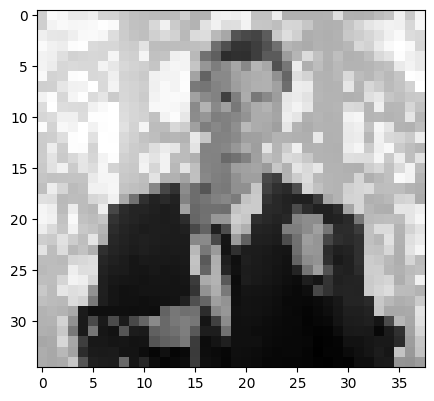

In [29]:
# load the image
image = Image.open('test_image.png')
# convert image to numpy array
data = asarray(image)
data_subsample = subsample(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_subsample, cmap='gray')
plt.show()

data_subsample2 = subsample(data_subsample)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample2, cmap='gray')
plt.show()

data_subsample3 = subsample(data_subsample2)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

In [36]:
def maxpool(x_in):
    H, W = x_in.shape[:2]
    out_h, out_w = H // 2, W // 2
    x_out = np.zeros((out_h, out_w), dtype=x_in.dtype)

    for i in range(out_h):
        for j in range(out_w):
            block = x_in[2*i:2*i+2, 2*j:2*j+2]   # 2×2 window
            x_out[i, j] = np.max(block)

    return x_out


In [37]:
print("Original:")
print(orig_4_4)
print("Maxpooled:")
print(maxpool(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Maxpooled:
[[6 8]
 [8 4]]


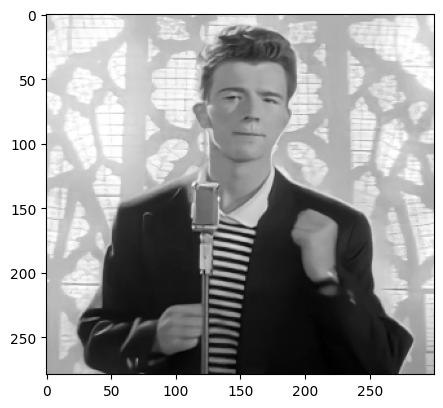

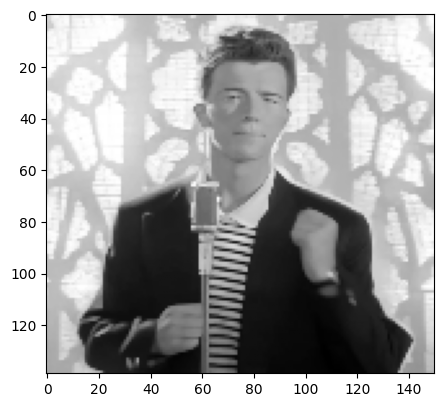

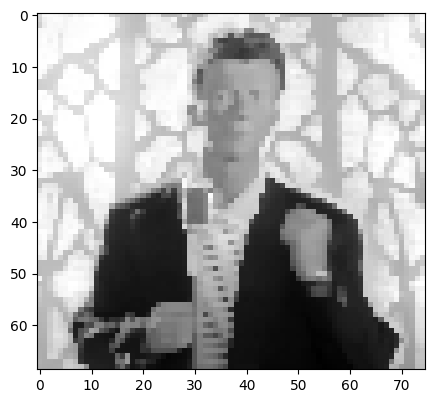

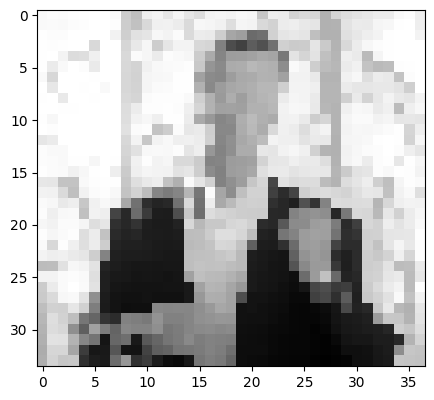

In [38]:
# Let's see what Rick looks like:
data_maxpool = maxpool(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool, cmap='gray')
plt.show()

data_maxpool2 = maxpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool2, cmap='gray')
plt.show()

data_maxpool3 = maxpool(data_maxpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

You can see that the stripes on his shirt gradually turn to white because we keep retaining the brightest local pixels.

In [39]:
def meanpool(x_in):
    H, W = x_in.shape[:2]
    out_h, out_w = H // 2, W // 2
    x_out = np.zeros((out_h, out_w), dtype=x_in.dtype)

    for i in range(out_h):
        for j in range(out_w):
            block = x_in[2*i:2*i+2, 2*j:2*j+2]   # 2×2 window
            x_out[i, j] = np.mean(block)

    return x_out


In [40]:
print("Original:")
print(orig_4_4)
print("Meanpooled:")
print(meanpool(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Meanpooled:
[[3 4]
 [5 2]]


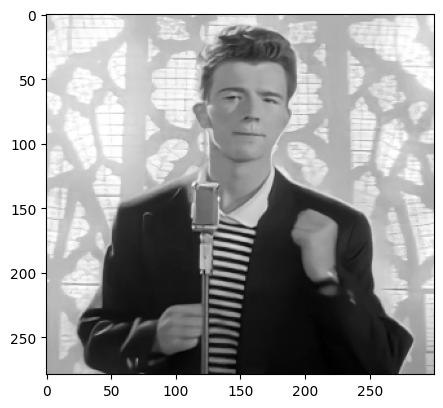

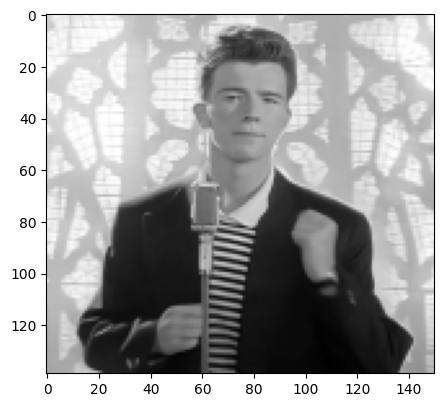

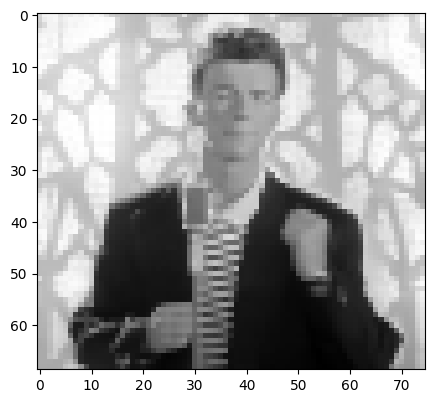

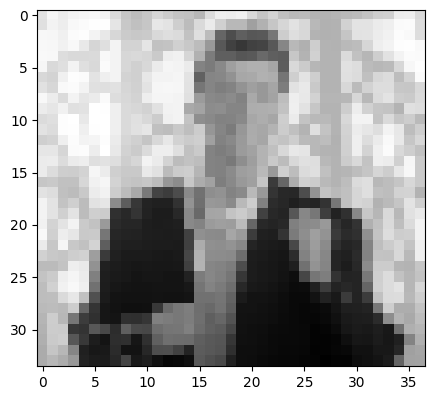

In [41]:
# Let's see what Rick looks like:
data_meanpool = meanpool(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool, cmap='gray')
plt.show()

data_meanpool2 = meanpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool2, cmap='gray')
plt.show()

data_meanpool3 = meanpool(data_meanpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

Notice that the three low resolution images look quite different. <br>

Now let's upscale them again

In [42]:
# Define 2 by 2 original patch
orig_2_2 = np.array([[6, 8], [8,4]])
print(orig_2_2)

[[6 8]
 [8 4]]


In [43]:
def duplicate(x_in):
    x_out = np.zeros((x_in.shape[0]*2, x_in.shape[1]*2), dtype=x_in.dtype)

    for i in range(x_in.shape[0]):
        for j in range(x_in.shape[1]):
            # copy each value into a 2x2 block
            x_out[2*i:2*i+2, 2*j:2*j+2] = x_in[i, j]

    return x_out


In [44]:
print("Original:")
print(orig_2_2)
print("Duplicated:")
print(duplicate(orig_2_2))

Original:
[[6 8]
 [8 4]]
Duplicated:
[[6 6 8 8]
 [6 6 8 8]
 [8 8 4 4]
 [8 8 4 4]]


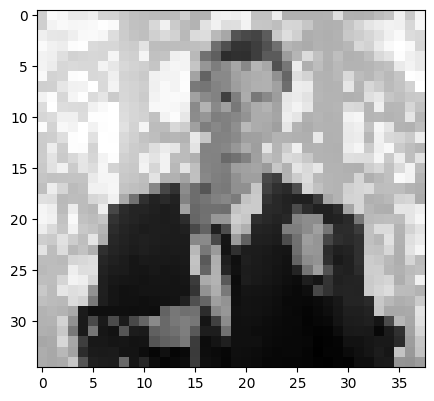

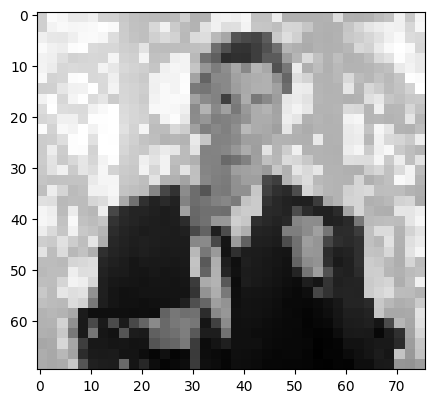

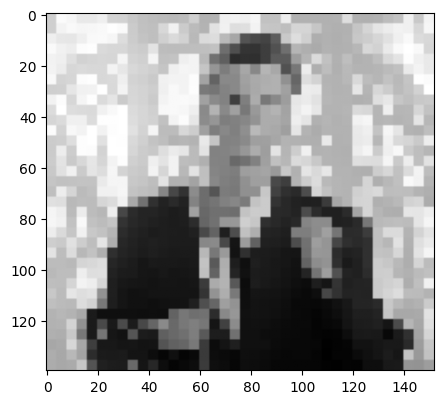

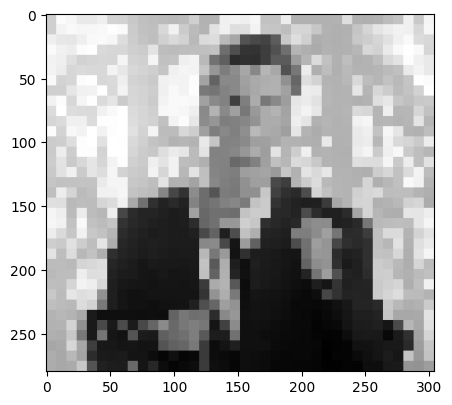

In [45]:
# Let's re-upsample, sub-sampled rick
data_duplicate = duplicate(data_subsample3);

plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_duplicate, cmap='gray')
plt.show()

data_duplicate2 = duplicate(data_duplicate)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate2, cmap='gray')
plt.show()

data_duplicate3 = duplicate(data_duplicate2)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate3, cmap='gray')
plt.show()

They look the same, but if you look at the axes, you'll see that the pixels are just duplicated.

In [46]:
def max_unpool(x_in, x_high_res):
    H, W = x_in.shape
    x_out = np.zeros((H*2, W*2), dtype=x_in.dtype)

    for i in range(H):
        for j in range(W):
            # Find the 2×2 block in the original high-res image
            block = x_high_res[2*i:2*i+2, 2*j:2*j+2]
            # Locate the max position
            max_idx = np.unravel_index(np.argmax(block), block.shape)
            # Place the pooled value back into that position
            x_out[2*i + max_idx[0], 2*j + max_idx[1]] = x_in[i, j]

    return x_out


In [47]:
print("Original:")
print(orig_2_2)
print("Max unpooled:")
print(max_unpool(orig_2_2,orig_4_4))

Original:
[[6 8]
 [8 4]]
Max unpooled:
[[0 0 0 0]
 [6 0 0 8]
 [0 0 0 4]
 [0 8 0 0]]


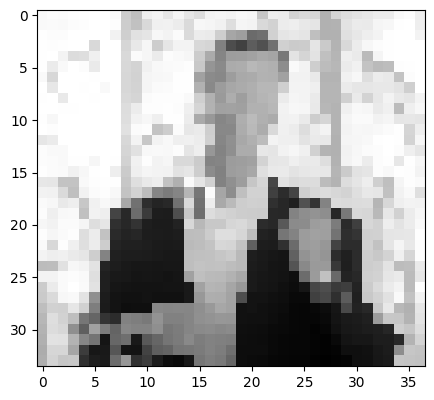

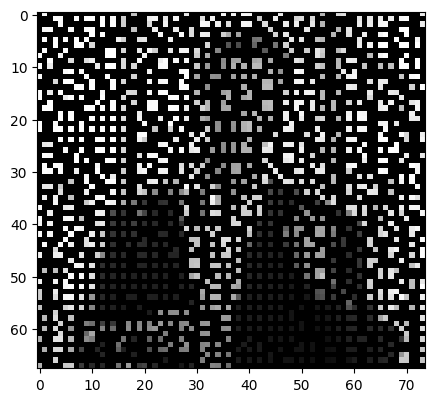

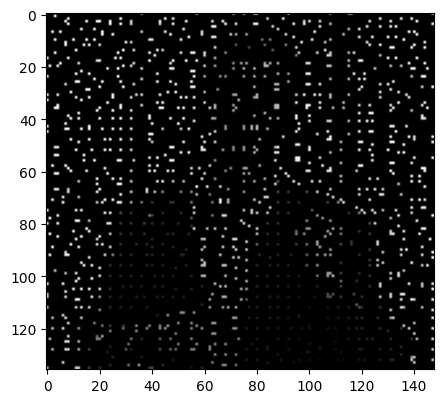

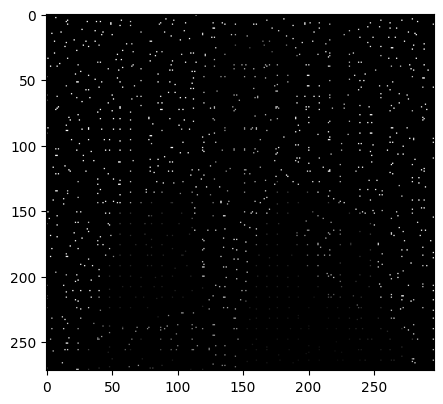

In [48]:
# Let's re-upsample, sub-sampled rick
data_max_unpool= max_unpool(data_maxpool3,data_maxpool2);

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool, cmap='gray')
plt.show()

data_max_unpool2 = max_unpool(data_max_unpool, data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool2, cmap='gray')
plt.show()

data_max_unpool3 = max_unpool(data_max_unpool2, data)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool3, cmap='gray')
plt.show()

Finally, we'll try upsampling using bilinear interpolation.  We'll treat the positions off the image as zeros by padding the original image and round fractional values upwards using np.ceil()

In [52]:
def bilinear(x_in):
    H, W = x_in.shape
    # edge-pad one row/col so neighbors exist at the borders
    x_pad = np.pad(x_in, ((0,1), (0,1)), mode='edge')

    x_out = np.zeros((2*H, 2*W), dtype=float)

    # copy originals
    x_out[::2, ::2] = x_in

    # even rows, odd cols: horizontal interp
    x_out[::2, 1::2] = 0.5 * (x_pad[:H, :W] + x_pad[:H, 1:W+1])

    # odd rows, even cols: vertical interp
    x_out[1::2, ::2] = 0.5 * (x_pad[:H, :W] + x_pad[1:H+1, :W])

    # odd rows, odd cols: bilinear of 4 neighbors
    x_out[1::2, 1::2] = 0.25 * (
        x_pad[:H, :W] + x_pad[:H, 1:W+1] + x_pad[1:H+1, :W] + x_pad[1:H+1, 1:W+1]
    )

    return x_out


In [53]:
print("Original:")
print(orig_2_2)
print("Bilinear:")
print(bilinear(orig_2_2))

Original:
[[6 8]
 [8 4]]
Bilinear:
[[6.  7.  8.  8. ]
 [7.  6.5 6.  6. ]
 [8.  6.  4.  4. ]
 [8.  6.  4.  4. ]]


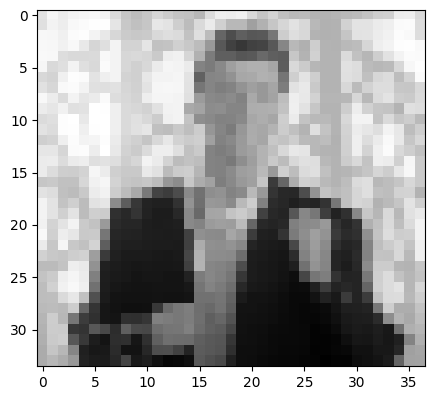

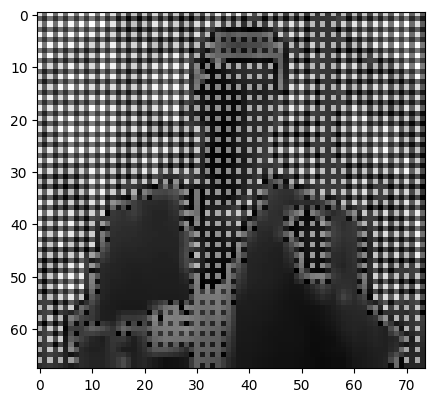

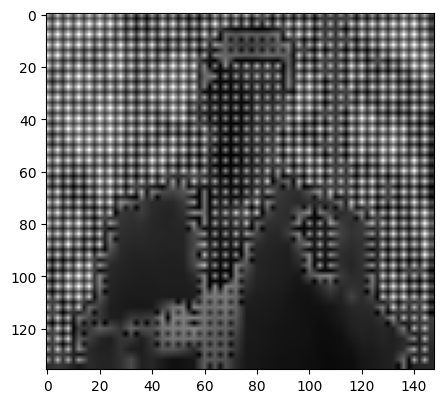

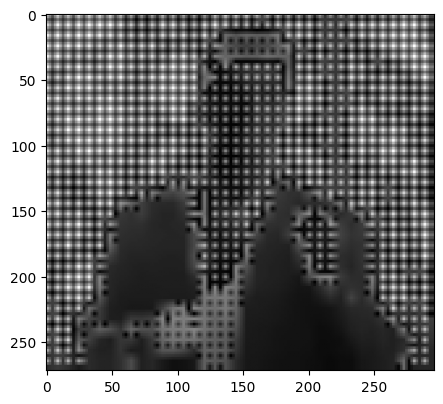

In [54]:
# Let's re-upsample, sub-sampled rick
data_bilinear = bilinear(data_meanpool3);

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_bilinear, cmap='gray')
plt.show()

data_bilinear2 = bilinear(data_bilinear)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear2, cmap='gray')
plt.show()

data_bilinear3 = duplicate(data_bilinear2)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear3, cmap='gray')
plt.show()